## Pymaceuticals 

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# RAW DATA - mouse_metadata
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# RAW DATA - study_results
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset and display the data table for preview
mice_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Change Mouse ID to Mouse_ID
renamed_mice = mice_data.rename(columns={"Mouse ID":"Mouse_ID"})
renamed_mice

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
total_mice = renamed_mice.Mouse_ID.nunique()
total_mice

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
final_mice = renamed_mice.drop_duplicates()
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_mice

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
total_mice = final_mice.Mouse_ID.nunique()
total_mice

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# Mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_drug = final_mice.groupby(['Drug Regimen'])
print(grouped_drug)
grouped_drug.count().head(10)

,Mouse_ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,160,160,160,160,160,160,160
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [12]:
# Mean
tumor_mean = grouped_drug['Tumor Volume (mm3)'].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.368318
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Median
tumor_median = grouped_drug['Tumor Volume (mm3)'].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Variance
tumor_var = grouped_drug['Tumor Volume (mm3)'].var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.278090
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Standard Deviation
tumor_sd = grouped_drug['Tumor Volume (mm3)'].std()
tumor_sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.502160
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# SEM
tumor_sem = grouped_drug['Tumor Volume (mm3)'].sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = pd.DataFrame({"Mean": tumor_mean,
                              "Median": tumor_median,
                               "Variance" : tumor_var,
                              "Standard Deviation": tumor_sd,
                              "SEM": tumor_sem})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Using the aggregation method, produce the same summary statistics in a single line
final_mice.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

              Timepoint                                          
                   mean median         var        std       sem  
Drug Regimen                                                     
Capomulin     21.565217     20  206.928043  14.384994  0.948518  
Ceftamin      19.747191     20  204.031772  14.283969  1.070629  
Infubinol     18.174157     15  181.534470  13.473473  1.009879  
Ketapril      19.707447     20  196.839089  14.029935  1.023238  
Naftisol      19.623656     20  201.208951  14.184814  1.040081  
Placebo       18.674033     15  192.954266  13.890798  1.032495  
Propriva      16.968750     15  180.848074  13.447977  1.063156  
Ramicane      21.425439     20  203.796178  14.275720  0.945433  
Stelasyn      19.226519     20  191.620626  13.842710  1.028921  
Zoniferol     19.368132     15  206.918979  14.384679  1.066263

## Bar and Pie Charts

In [20]:
# Total number of measurements for each drug regimen
total_drugs = grouped_drug["Drug Regimen"].count()
total_drugs

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

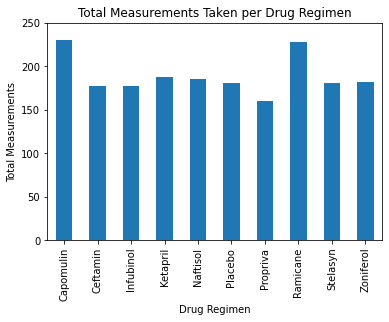

In [47]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using Pandas.
total_drugs.plot(kind="bar")
measurements = [230, 178, 178, 188, 186, 181, 160, 228, 181, 182]
plt.ylim(0, max(measurements)+20)
plt.title("Total Measurements Taken per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements");

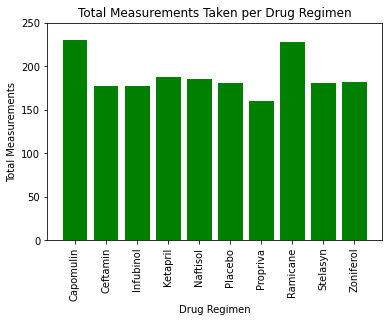

In [48]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using PyPlot.
Drug_Regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
measurements = [230, 178, 178, 188, 186, 181, 160, 228, 181, 182]
x_axis = np.arange(len(measurements))
plt.bar(x_axis, measurements, color="g", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_Regimen, rotation="vertical")
plt.ylim(0, max(measurements)+20)
plt.title("Total Measurements Taken per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements");

In [32]:
# Total number of females and males in study
grouped_sex = final_mice.groupby(['Sex'])
total_sex = grouped_sex["Sex"].count()
total_sex

Sex
Female    934
Male      958
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

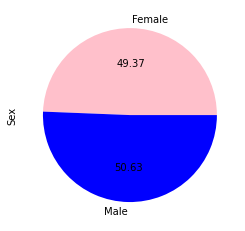

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_sex.plot.pie(labels = ["Female", "Male"], colors = ["pink", "blue"], autopct="%.2f")

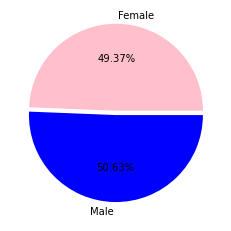

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using PyPlot
labels = ["Female", "Male"]
sizes = [934, 958]
colors = ["pink", "blue"]
explode = (0.05, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", startangle=0);

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

final_mice.Sex.count()

1892

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
